In [ ]:
# This code is based on the data from (https://open.toronto.ca/dataset/toronto-beaches-water-quality/) in .csv format.

import pandas as pd
import matplotlib.pyplot as plt

#read in .csv file
df = pd.read_csv("toronto-beaches-water-quality - 4326.csv")

# convert to datetime ojects, remove NaNs, and create new column for year
df["collectionDate"] = pd.to_datetime(df["collectionDate"])
df = df.dropna(subset=["eColi"])
df["year"] = df["collectionDate"].dt.year



In [3]:
# creates one row per beach per date per year
daily_beach_mean = (
    df.groupby(["beachName", "collectionDate", "year"], as_index=False)
      .agg(mean_ecoli=("eColi", "mean"))
)

In [4]:
# summary statistics for each year
yearly_summary = (
    daily_beach_mean
    .groupby("year")["mean_ecoli"] # group by year
    .agg(
        median="median",
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75),
        n_days="count"
    )
    .reset_index()
)

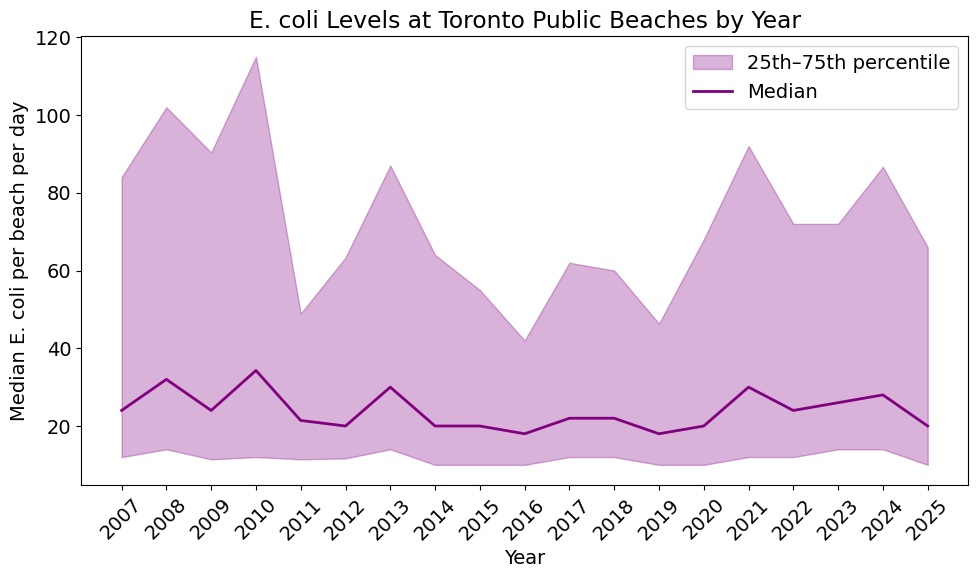

In [7]:
plt.rcParams.update({"font.size": 14}) # change font to size 14 for entire plot

plt.figure(figsize=(10, 6))

# Shaded area for 25th–75th percentile
plt.fill_between(
    yearly_summary["year"],
    yearly_summary["q25"],
    yearly_summary["q75"],
    color="purple",
    alpha=0.3,
    label="25th–75th percentile"
)

# Median line
plt.plot(
    yearly_summary["year"],
    yearly_summary["median"],
    color="purple",
    linewidth=2,
    label="Median"
)

plt.xlabel("Year")
plt.ylabel("Median E. coli per beach per day")
plt.title("E. coli Levels at Toronto Public Beaches by Year")

plt.xticks(yearly_summary["year"], rotation=45)

plt.legend()  # Show legend

plt.tight_layout()
plt.show()
